# word2vec

Python code to draw figures of this presentation.

In [1]:
import altair
from altair_saver import save
from gensim.models.keyedvectors import Word2VecKeyedVectors, KeyedVectors

path_model: str = "cc.en.300.bin"

## Model info

Some info about a `.bin` model by Facebook using [`gensim`](https://github.com/piskvorky/gensim).

In [2]:
#if path_model.endswith('.bin'):
#fb_model: FastText = load_facebook_model(path_model)
#print(f"Dimensionality of the feature vectors:           {fb_model.vector_size}")
#print(f"The maximum distance between the current"
#      f" and predicted word within a sentence (Context): {fb_model.window}")
#print(f"Training algorithm:                              {'skip-gram' if fb_model.sg == 1 else 'CBOW'} + {'hierarchical softmax' if fb_model.hs == 1 else 'negative sampling'}")
#del fb_model

## Word clustering 

In [3]:
countries = ["france", "greece", "germany", "italy", "spain", "norway"]
food = ["banana", "pizza", "apple", "pasta"]
familial_relationship = ["nephew", "niece", "uncle", "aunt"]
animals = ["cat", "dog", "bear", "horse", "rabbit", "mouse"]
capitals = ["madrid", "athens"]

words = countries + food + familial_relationship + animals + capitals
categories = [
    {"countries": countries},
    {"food": food},
    {"familial-relationship": familial_relationship},
    {"animals": animals},
    {None},
]

For pre-trained word vectors compatible with the original C [word2vec-tool](https://code.google.com/archive/p/word2vec/) format: a plain text where from second line you find a term and its vector, you must do the following.

In [4]:
from whatlies import EmbeddingSet, Embedding
from whatlies.language import FasttextLanguage

if path_model.endswith('.vec'):
    model: Word2VecKeyedVectors = KeyedVectors.load_word2vec_format(path_model, binary=False)
    emb = EmbeddingSet({t: Embedding(t, model.get_vector(t)) for t in words})
else:
    lang = FasttextLanguage(path_model)
    emb: EmbeddingSet = lang[words]

We can't plot a vector with 300-D, so we must reduce dimensionality.

In [5]:
from whatlies.transformers import Pca

pca_emb: EmbeddingSet = emb.transform(Pca(2))

Finally, we can plot and save the 2-D vector space.

In [6]:
from altair import Scale

for category in categories:
    for key in category:
        plot_pca: altair.Chart = pca_emb.assign(
            category=lambda e: False if key is None else e.name in category[key]).plot_interactive(
            color="category", title="Word clustering")

        plot_pca = plot_pca.configure_legend(disable=True)
        plot_pca = plot_pca.configure_title(font='DejaVuLGCSans')
        plot_pca = plot_pca.properties(width=400, height=400)
        plot_pca = plot_pca.configure_text(font='DejaVuLGCSans')
        plot_pca = plot_pca.configure_axis(labelFont='DejaVuMathTeXGyre', titleFont='DejaVuLGCSans')
        plot_pca = plot_pca.encode(altair.X(scale=Scale(domain=[-.9, 1.7])))

        fp = "clustering"
        if key is not None:
            fp = f"{fp}-{key}"

        save(plot_pca, fp=f"src/contents/assets/img/{fp}.pdf", fmt="pdf", method="node")
        plot_pca.display()

(node:26402) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:26413) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)


alt.LayerChart(...)

(node:26423) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:26433) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)


alt.LayerChart(...)

(node:26443) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:26453) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)


alt.LayerChart(...)

(node:26464) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:26474) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)


alt.LayerChart(...)

(node:26484) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:26494) [DEP0040] DeprecationWarning: The `punycode` module is deprecated. Please use a userland alternative instead.
(Use `node --trace-deprecation ...` to show where the warning was created)


alt.LayerChart(...)

## Additive Compositionality

Some common stuff.

In [7]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mm = 1 / 25.4  # millimeters in inches
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
mpl.rcParams['font.family'] = fm.FontProperties(fname='src/fonts/dejavu/sans/DejaVuLGCSans.ttf').get_name()
DejaVuMathTeXGyre = fm.FontProperties(fname='src/fonts/dejavu/DejaVuMathTeXGyre.ttf')


def drawn_euclidean_plane(ax: Axes):
    # Set bottom and left spines as x and y axes of coordinate system
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Draw arrows
    ax.plot(1, 0, marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot(0, 1, marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    # Set 'x' and 'y' ticks font
    ax.tick_params(axis='both', which='both', labelfontfamily=DejaVuMathTeXGyre.get_name())

    plt.gcf().set_size_inches(161 * mm, 164 * mm)


def plot_data():
    for embedding in pca_emb:
        if embedding.name in ["greece", "spain", "madrid"]:
            embedding.plot()
        elif embedding.name == "athens":
            embedding.plot(kind="scatter")

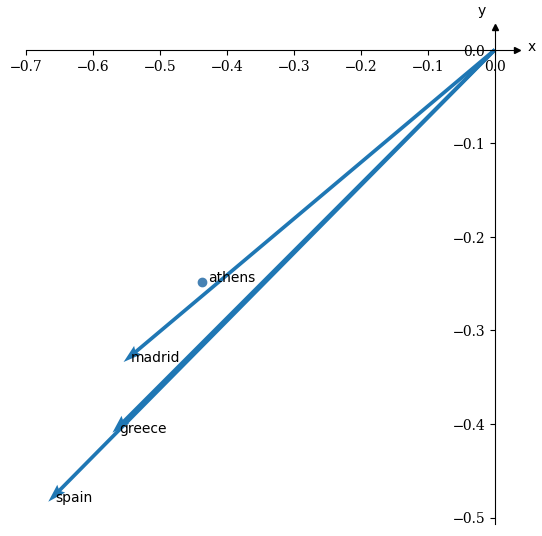

In [8]:
ax: Axes = plt.gca()

drawn_euclidean_plane(ax)

# Plot data
plot_data()

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', labelpad=-24, x=1.03)
ax.set_ylabel('y', labelpad=-21, y=1.02, rotation=0)

plt.savefig('src/contents/assets/img/additive-compositionality.pdf')

plt.show()

### What is the capital of Greece?

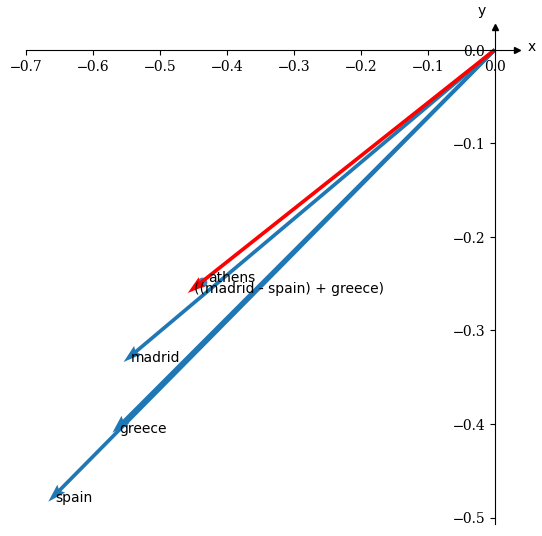

In [9]:
ax: Axes = plt.gca()

drawn_euclidean_plane(ax)

# Plot data
plot_data()
(pca_emb["madrid"] - pca_emb["spain"] + pca_emb["greece"]).plot(color="red", show_ops=True)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', labelpad=-24, x=1.03)
ax.set_ylabel('y', labelpad=-21, y=1.02, rotation=0)

plt.savefig('src/contents/assets/img/athens.pdf')

plt.show()

## Weaknesses

### Gender bias

Common stuff.

In [10]:
from matplotlib.colorbar import Colorbar

stereotype_pairs = [
    ('sewing', 'carpentry'),
    ('nurse', 'physician'),
    ('nurse', 'surgeon'),
    ('nurse', 'doctor'),
]

appropriate_pairs = [
    ('woman', 'man'),
    ('she', 'he'),
    ('her', 'him'),
    ('girl', 'boy')
]

random_pairs = [
    ('dog', 'firehydrant'),
    ('carpet', 'leg'),
    ('hot', 'cold'),
]

all_pairs = [stereotype_pairs, appropriate_pairs, random_pairs]

flatten = lambda l: [item for sublist in l for item in sublist]


def calc_axis(pair_list, language_model):
    return [language_model[t1] - language_model[t2] for (t1, t2) in pair_list]


try:
    lang
except NameError:
    raise "`lang` is not defined! Probably your model has '.vec' extension. At the moment this cell doesn't handle this case!"

Before removing bias.

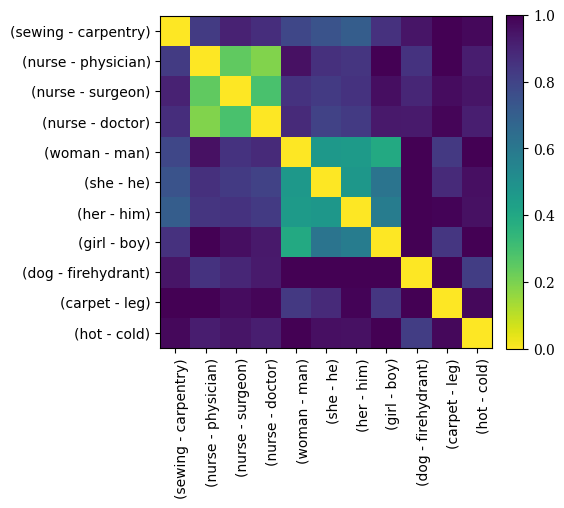

In [11]:
def make_correlation_plot(pairs, language_model, metric="cosine"):
    axes = [calc_axis(p, language_model) for p in pairs]
    emb_pairs = EmbeddingSet(*flatten(axes))
    emb_pairs.plot_distance(metric=metric)


make_correlation_plot(pairs=all_pairs, language_model=lang)

# Get the current axis 
ax: Axes = plt.gca()
# Get the images on an axis
im = ax.images
# Assume colorbar was plotted last one plotted last
cb: Colorbar = im[-1].colorbar
# Remove
cb.ax.remove()

plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelfontfamily=DejaVuMathTeXGyre.get_name())

plt.gcf().set_size_inches(161 * mm, 164 * mm)
plt.tight_layout()
plt.savefig('src/contents/assets/img/gender-bias-before.pdf')

plt.show()

After removing bias.

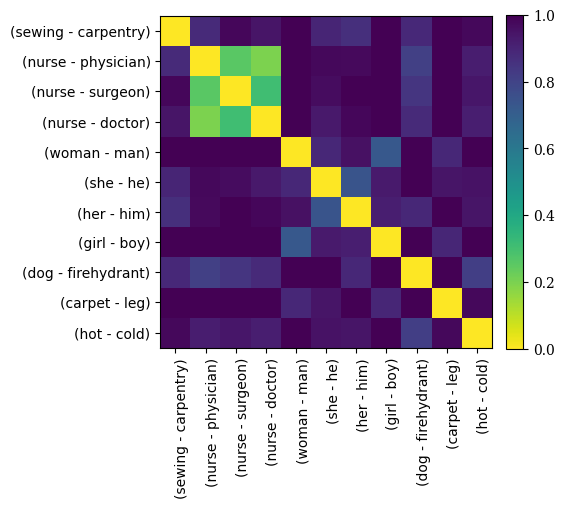

In [12]:
def make_debias_correlation_plot(pairs, language_model, metric='cosine'):
    # Calculate the embeddings just like before.
    axes = [calc_axis(p, language_model) for p in pairs]
    emb_pairs = EmbeddingSet(*flatten(axes))

    # Calculate the "gender"-direction
    norm_emb = EmbeddingSet(
        (language_model['man'] - language_model['woman']),
        (language_model['king'] - language_model['queen']),
        (language_model['father'] - language_model['mother'])
    ).average()

    # Project all embeddings away from this axis.
    emb_pairs = emb_pairs | norm_emb

    # Plot the result.
    emb_pairs.plot_distance(metric=metric)


make_debias_correlation_plot(pairs=all_pairs, language_model=lang)

plt.gca().images[-1].colorbar.ax.remove()
plt.colorbar(fraction=0.046, pad=0.04).ax.tick_params(labelfontfamily=DejaVuMathTeXGyre.get_name())

plt.gcf().set_size_inches(161 * mm, 164 * mm)
plt.tight_layout()
plt.savefig('src/contents/assets/img/gender-bias-after.pdf')

plt.show()

### Polysemous words

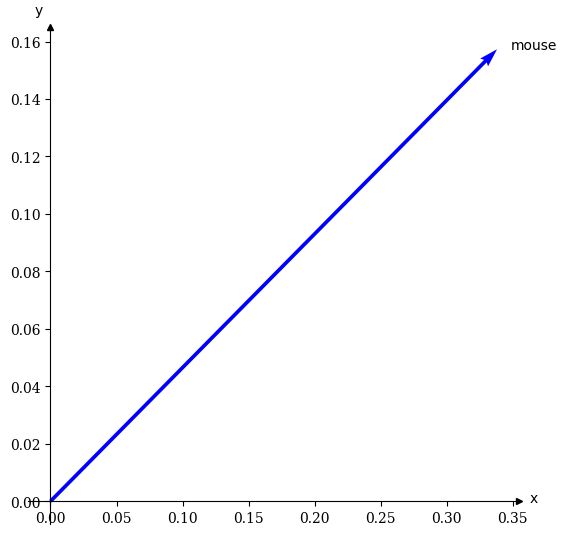

In [13]:
ax: Axes = plt.gca()

drawn_euclidean_plane(ax)

# Plot data
pca_emb["mouse"].plot(kind="arrow", color="blue")

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', labelpad=-24, x=1.03)
ax.set_ylabel('y', labelpad=-21, y=1.02, rotation=0)

plt.savefig('src/contents/assets/img/polysemous-word2vec.pdf')

plt.show()

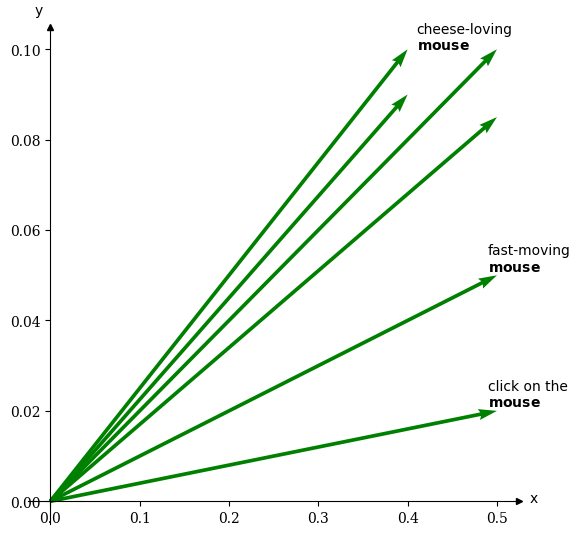

In [14]:
ax: Axes = plt.gca()

drawn_euclidean_plane(ax)

# Plot data
Embedding(None, [0.5, 0.1]).plot(kind="arrow", color="green")
Embedding(None, [0.5, 0.085]).plot(kind="arrow", color="green")
Embedding("cheese-loving\n" + r"$\bf{mouse}$", [0.4, 0.1]).plot(kind="arrow", color="green")
Embedding("fast-moving\n" + r"$\bf{mouse}$", [0.5, 0.05]).plot(kind="arrow", color="green")
Embedding(None, [0.4, 0.09]).plot(kind="arrow", color="green")
Embedding("click on the\n" + r"$\bf{mouse}$", [0.5, 0.02]).plot(kind="arrow", color="green")

for child in ax.get_children():
    if isinstance(child, plt.Text):
        if "fast-moving" in child.get_text() or "click on the" in child.get_text():
            pos = child.get_position()
            child.set_x(pos[0] + (-.02))
            child.set_y(pos[1] + .001)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel('x', labelpad=-24, x=1.03)
ax.set_ylabel('y', labelpad=-21, y=1.02, rotation=0)

plt.savefig('src/contents/assets/img/polysemous-bert.pdf')

plt.show()

## Distance methods comparison

In [15]:
from sklearn.metrics.pairwise import check_pairwise_arrays
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

e: EmbeddingSet = emb  # replace with pca_emb to estimate the difference on Euclidean plane
near_athens: Embedding = e["madrid"] - e["spain"] + e["greece"]
athens: Embedding = e["athens"]

cosine = near_athens.distance(athens, metric='cosine')
X, Y = check_pairwise_arrays([near_athens.vector], [athens.vector])
sqeuclidean = pairwise_distances(normalize(X, copy=True),
                                 normalize(Y, copy=True),
                                 metric='sqeuclidean')[0][0]

print(f"Cosine distance:               {cosine}")
print(f"Double cosine distance:        {cosine * 2}")
print(f"Squared Euclidean distance:    {sqeuclidean}")

Cosine distance:               0.4239501953125
Double cosine distance:        0.847900390625
Squared Euclidean distance:    0.8479001439913932
